<a href="https://colab.research.google.com/github/MrDegglan/9785-crypto-ml/blob/Dohyeon-Lee/Data_analysis_and_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Library Import
https://trello.com/b/8l8sGsy8/project-proposal

In [ ]:
!pip install cryptocmd
#!pip install skforecast

# !pip install numpy
# !pip install pandas
# !pip install -U scikit-learn
# !pip install matplotlib

# https://conda-forge.org/blog/posts/2021-11-03-tensorflow-gpu/
# jupyter notebook   --NotebookApp.allow_origin='https://colab.research.google.com'   --port=8888   --NotebookApp.port_retries=0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 5.5 MB/s 


tabular vs multidimensional

pandas used for tabular data, statistics 

numpy used for multidimentional like images

In [ ]:
# Library for crypto currency prediction
from cryptocmd import CmcScraper

# Dependency for pandas, provides arrays, < 50K
import numpy as np

# adds support for DataFrames, > 500K
import pandas as pd

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

# Seasonality anaylsis
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from pylab import rcParams

# MinMaxScalar normalises numeric data between 0 and 1 for the purpose of ML training
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale
from sklearn.preprocessing import LabelEncoder

# Used for making a train and test split
from sklearn.model_selection import train_test_split

# If training new models set TRAINING to true
TRAINING = False

# If running on local machine set LOCAL to true, Neccessary for training.
LOCAL = False

# Hourly Data Source
HOURLY = True

In [ ]:
if(LOCAL):
  model_simple_path = './Models/RNN_LSTM_SIMPLE/'
  model_complex_path = './Models/RNN_LSTM_COMPLEX/'
  gru_base_path = './Models/RNN_GRU_BASE/'
  Hourly_Data_Path = '/home/raoufyounes/dataScience/Gemini_BTCUSD_1h.csv'
   
else:
  from google.colab import drive
  drive.mount('/content/drive')
  
  if(HOURLY):
    Hourly_Data_Path = '/content/drive/MyDrive/9785_Colab_Notebooks/Data/Gemini_BTCUSD_1h.csv'
    model_simple_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Hourly/RNN_LSTM_SIMPLE/'
    model_complex_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Hourly/RNN_LSTM_COMPLEX/'
    gru_base_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Hourly/RNN_GRU_BASE/'
  else:
    model_simple_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Daily/RNN_LSTM_SIMPLE/'
    model_complex_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Daily/RNN_LSTM_COMPLEX/'
    gru_base_path = '/content/drive/MyDrive/9785_Colab_Notebooks/Ml_Models/Daily/RNN_GRU_BASE/'


Mounted at /content/drive


# Data Download and preperation

In [ ]:
# Data Import
if(HOURLY):
  data = pd.read_csv(Hourly_Data_Path,skiprows=1)
  data.columns = [x.strip().lower().replace(' ','_') for x in data.columns]
  display(data)
else:
  # ==============================================================================
  # Scraper is initialized, symbol, start and end of download are included
  scraper = CmcScraper('BTC', '28-04-2013', '24-08-2022')
  # Transform collected data into a dataframe
  data = scraper.get_dataframe()
  data.columns = [x.strip().lower().replace(' ','_') for x in data.columns]
  display(data)

,unix,date,symbol,open,high,low,close,volume_btc,volume_usd
0,1662336000000,2022-09-05 00:00:00,BTC/USD,20008.78,20050.00,19880.90,19909.56,13.821605,275182.078822
1,1662332400000,2022-09-04 23:00:00,BTC/USD,19838.29,20024.32,19835.85,20008.78,40.951336,819386.268728
2,1662328800000,2022-09-04 22:00:00,BTC/USD,19874.06,19881.01,19825.00,19838.29,9.563909,189731.591150
3,1662325200000,2022-09-04 21:00:00,BTC/USD,19912.15,19933.17,19837.28,19874.06,9.887421,196503.202969
4,1662321600000,2022-09-04 20:00:00,BTC/USD,19885.61,19928.72,19868.41,19912.15,8.130148,161888.723910
...,...,...,...,...,...,...,...,...,...
60556,1444323600,2015-10-08 17:00:00,BTC/USD,244.25,244.99,244.02,244.99,3.920632,960.515634
60557,1444320000,2015-10-08 16:00:00,BTC/USD,244.92,244.92,244.25,244.25,3.895252,951.415413
60558,1444316400,2015-10-08 15:00:00,BTC/USD,245.00,245.00,244.92,244.92,3.016926,738.905474
60559,1444312800,2015-10-08 14:00:00,BTC/USD,245.00,245.00,244.50,245.00,4.453649,1091.143988


In [ ]:
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')#.astype(int) / 10**9
data['hour'] = data['date'].dt.hour
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data_raw = data
data = data.drop(['date','unix','symbol'], axis=1,errors='ignore')

with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  display(data.head(30))
  print(len(data))

,open,high,low,close,volume_btc,volume_usd,hour,day,month,year
0,20008.78,20050.00,19880.90,19909.56,13.821605,275182.078822,0,5,9,2022
1,19838.29,20024.32,19835.85,20008.78,40.951336,819386.268728,23,4,9,2022
2,19874.06,19881.01,19825.00,19838.29,9.563909,189731.591150,22,4,9,2022
3,19912.15,19933.17,19837.28,19874.06,9.887421,196503.202969,21,4,9,2022
4,19885.61,19928.72,19868.41,19912.15,8.130148,161888.723910,20,4,9,2022
5,19848.90,19924.60,19830.54,19885.61,8.962909,178232.904090,19,4,9,2022
6,19845.67,19879.86,19812.00,19848.90,23.953104,475442.759237,18,4,9,2022
7,19902.02,19948.03,19840.14,19845.67,28.897137,573483.041076,17,4,9,2022
8,19783.42,19914.37,19720.86,19902.02,27.771121,552701.411734,16,4,9,2022
9,19734.51,19792.57,19695.99,19783.42,10.997216,217562.549487,15,4,9,2022


60561


## Visualization and Initial Analysis

In [ ]:
# Select close price and date column from a raw dataset
BTC_close = data_raw[['date', 'close']]

# print first and last point in dataset
pd.DataFrame({'First' : [BTC_close['date'].min()],'Last' :  [BTC_close['date'].max()]})

,First,Last
0,2015-10-08 13:00:00,2022-09-05


In [ ]:
# Summarise variables
data.describe()

,open,high,low,close,volume_btc,volume_usd,hour,day,month,year
count,60561.000000,60561.000000,60561.000000,60561.000000,60561.000000,6.056100e+04,60561.000000,60561.000000,60561.000000,60561.000000
mean,14500.454623,14580.646913,14414.505700,14500.782587,131.552528,1.472634e+06,11.501511,15.746685,6.486369,2018.725087
std,16900.934136,16994.960484,16799.676978,16900.846001,255.555156,3.018594e+06,6.922176,8.801608,3.457071,2.023214
min,0.000000,243.600000,0.000000,243.600000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,2015.000000
25%,2559.250000,2569.990000,2545.190000,2559.490000,20.848782,9.542608e+04,6.000000,8.000000,3.000000,2017.000000
50%,7951.870000,7991.940000,7909.780000,7952.700000,55.399144,5.133180e+05,12.000000,16.000000,6.000000,2019.000000
75%,19210.140000,19299.040000,19136.770000,19210.190000,138.613540,1.611447e+06,18.000000,23.000000,10.000000,2020.000000
max,68636.960000,69000.000000,68477.940000,68636.960000,8526.751048,1.039629e+08,23.000000,31.000000,12.000000,2022.000000


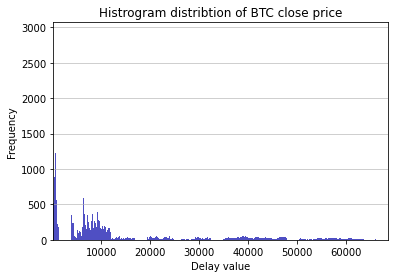

In [ ]:
# Histrogram distribtion of the target variable
n, bins, patches = plt.hist(x=data['close'], bins=1000, color='#0504aa', alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Delay value')
plt.ylabel('Frequency')
plt.title('Histrogram distribtion of BTC close price')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(data['close'].min(),data['close'].max())
plt.show()

In [ ]:
# Percentage of outlier in close variable
Q1 = data['close'].quantile(0.25)
Q3 = data['close'].quantile(0.75)
IQR = Q3 - Q1

perc_outlier = round(((data['close'] < (Q1 - 1.5 * IQR)) | (data['close'] > (Q3 + 1.5 * IQR))).sum() / len(data) * 100, 2)

print("Percentage of outliers in 'close' variable: ", perc_outlier, "%")

Percentage of outliers in 'close' variable:  9.99 %


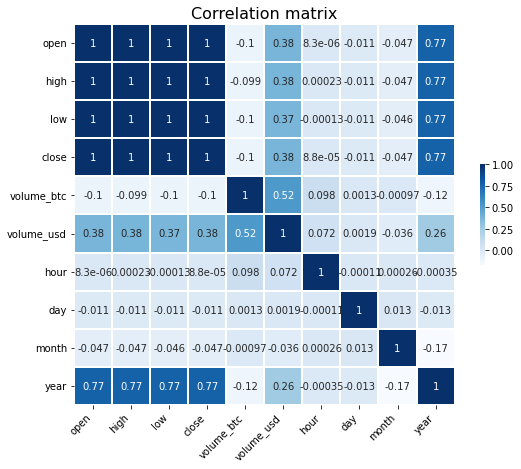

In [ ]:
# Correaltion matrix
corr = data.corr()
plt.figure(figsize=(9,7))
cor_map = sns.heatmap(corr, 
                      cmap="Blues", 
                      annot=True,
                      square=True,
                      linewidth=1,
                      cbar_kws={'fraction' : 0.01})
cor_map.set_xticklabels(cor_map.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Correlation matrix', fontsize=16)
plt.show()

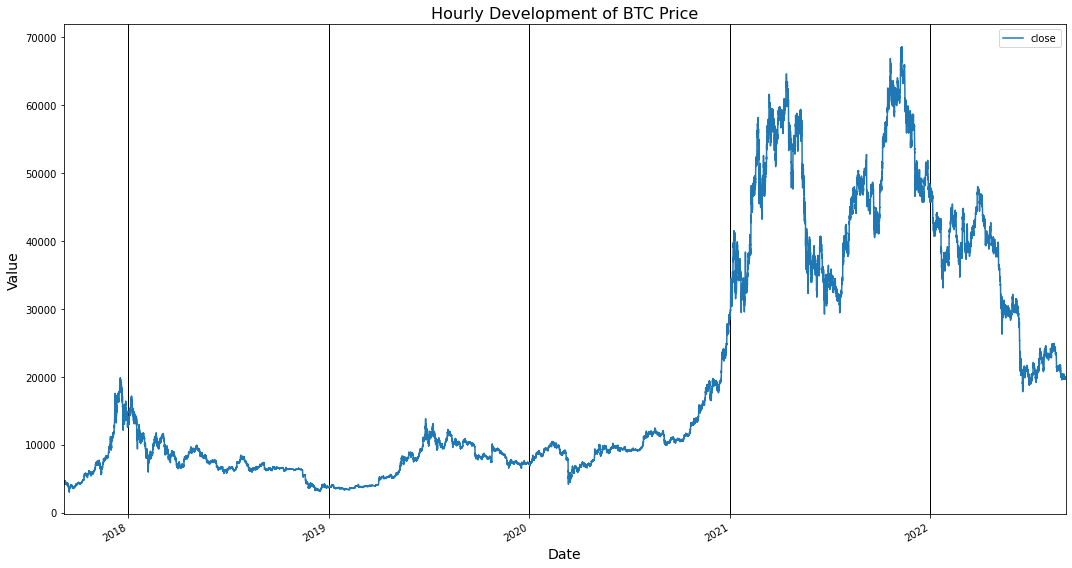

In [ ]:
# Setting the date as index (time series)
BTC_ts = BTC_close.set_index('date')

plt.rcParams["figure.figsize"] = [15, 8]
plt.rcParams["figure.autolayout"] = True

series = BTC_ts.loc[(BTC_ts.index > BTC_ts.index.max() - pd.DateOffset(years=5)) & (BTC_ts.index <= BTC_ts.index.max())]
ax = series.plot()
ax.xaxis.set_major_locator(mdates.YearLocator(1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
plt.gcf().autofmt_xdate()
plt.grid(which='major',axis ='x', linewidth='1', color='black')
plt.xlim(series.index.min(), series.index.max())
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Hourly Development of BTC Price', fontsize=16)

plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """


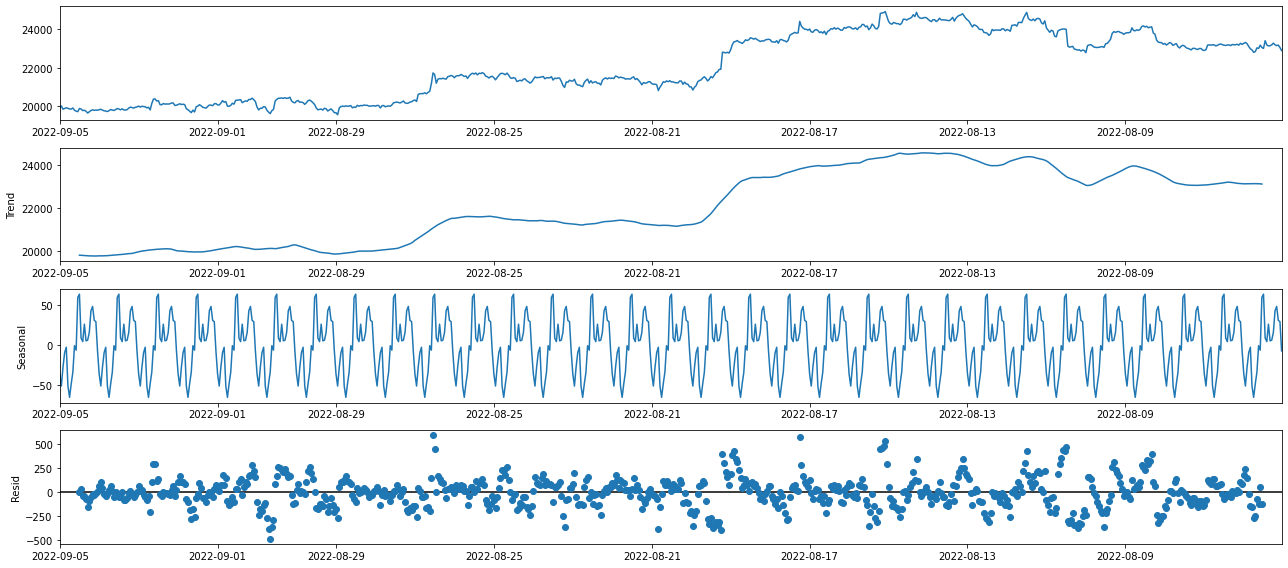

In [ ]:
# data seasonality analysis
season = BTC_ts.loc[(BTC_ts.index > BTC_ts.index.max() - pd.DateOffset(months=1)) & (BTC_ts.index <= BTC_ts.index.max())]

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(season, model='additive', freq = 24)
fig = decomposition.plot()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss

# ADF Unit root Test
result = adfuller(data.close.values, autolag='AIC')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
  print('\t%s: %.3f' % (key, value))
if 0.05 > result[1]:
  print ("Reject Ho - Time Series is Stationary (does not have a unit root)")
else:
  print("Failed to Reject Ho - Time Series is Non-atationary (has a unit root)")

# KPSS Test
statistic, p_value, n_lags, critical_values = kpss(data['close'], regression='ct')
# Format Output
print(f'\nKPSS Statistic: {statistic}')
print(f'p-value: {p_value}')
print(f'num lags: {n_lags}')
print('Critial Values:')
for key, value in critical_values.items():
  print(f'   {key}: {value}')
#print(f'Result: The series is {"not " if p_value < 0.05 else ""}stationary')
if 0.05 > p_value:
  print ("Reject Ho - Time Series is Non-stationary")
else:
  print("Failed to Reject Ho - Time Series is trend stationary")

ADF Statistic: -1.146559
p-value: 0.696152
Critical Values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
Failed to Reject Ho - Time Series is Non-atationary (has a unit root)

KPSS Statistic: 8.809379979154173
p-value: 0.01
num lags: 60
Critial Values:
   10%: 0.119
   5%: 0.146
   2.5%: 0.176
   1%: 0.216
Reject Ho - Time Series is Non-stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warn_msg.format(direction="smaller"), InterpolationWarning


In [ ]:
# define predictor and response variables
y = data['close']
x = data.drop(['close'], axis=1)

# add constant to predictor variables
x = sm.add_constant(x)

# Train a regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  close   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.494e+08
Date:                Mon, 17 Oct 2022   Prob (F-statistic):               0.00
Time:                        19:25:38   Log-Likelihood:            -3.5693e+05
No. Observations:               60561   AIC:                         7.139e+05
Df Residuals:                   60551   BIC:                         7.140e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        308.6187    575.570      0.536      0.5

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


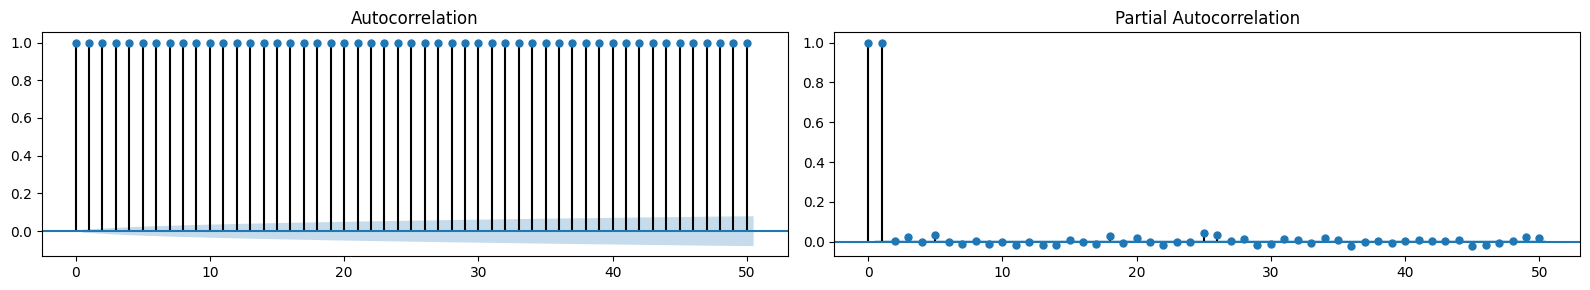

In [ ]:
# autocorrelation and partial autocorrelation functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2, figsize=(16,3), dpi= 100)
plot_acf(BTC_ts.close.tolist(), lags=50, ax=axes[0])
plot_pacf(BTC_ts.close.tolist(), lags=50, ax=axes[1])
plt.show()